# Introduction

For our project we are finding what neighborhood would be best in order to become a professional athlete. We came up with this idea while we were searching through the data sets and were able to find an interesting way to connect data sets!


# The Metric

To accomplish this, we decided to look for the neighborhoods that had the most baseball fields, courts and rinks, and swimming pools. This would offer the greatest amount of different oppurtunities to try different sports at a young age.

# Baseball Fields

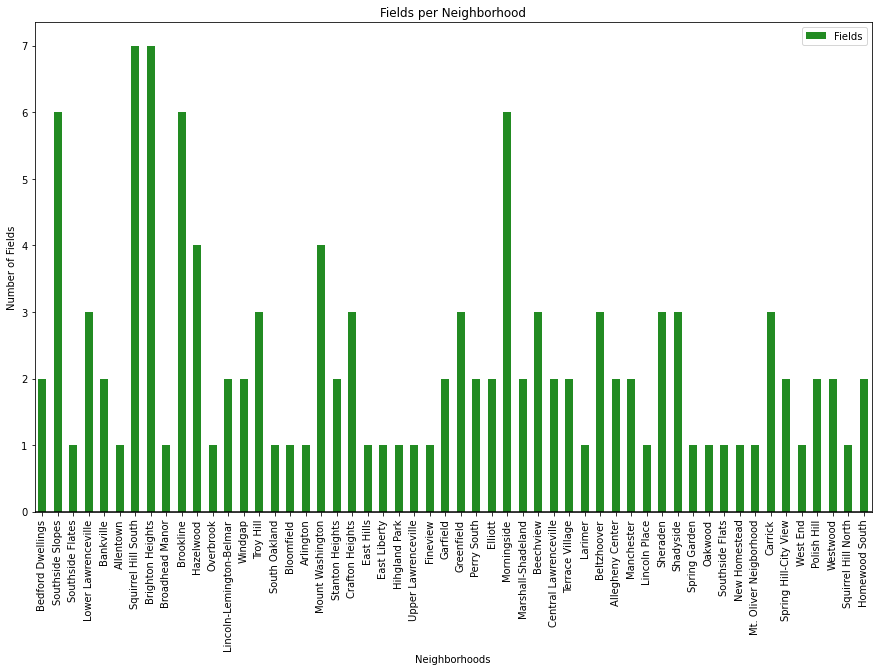

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
nlist = dict()
fields = pd.read_csv("fields.csv")
for index, row in fields.iterrows():
    place = row['Neighborhood']
    if place in nlist:
        nlist[place] = nlist[place]+1  
    if place not in nlist:
        nlist[place] = 1
neighborhoods = list(nlist.keys())
fields = list(nlist.values())
dataset = pd.DataFrame({'Neighborhood': neighborhoods,
                        'Fields': fields})
dataset.plot.bar(x='Neighborhood', y='Fields', rot=0, color= 'forestgreen', figsize=(15, 9))
plt.title("Fields per Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Fields")
plt.xticks(rotation=90)
plt.axhline(0, color='k')

We know now that Squirrel Hill South, Southside Slopes, Brighton Heights, and Morningside have the most baseball fields. However, we are trying to find the best baseball fields, so we need to add some qualifiers. If we remove fields without a backstop (the fence that keeps the ball from flying into the crowd) we remove fields that are not game quality.

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
nlist = dict()
sum=0
fields = pd.read_csv("fields.csv")
for index, row in fields.iterrows():
    place = row['Neighborhood']
    backstop = row ['Back Stop']
    if place in nlist and backstop != 1:
        nlist[place] = nlist[place]+1
        sum+=1
    if place not in nlist and backstop != 1:
        nlist[place] = 1
        sum+=1
print(sum)
print(nlist)

4
{'Allentown': 1, 'Manchester': 1, 'Squirrel Hill South': 1, 'Southside Slopes': 1}


There are only 4 fields that are not of game quality, and we can remove those from our datatset.

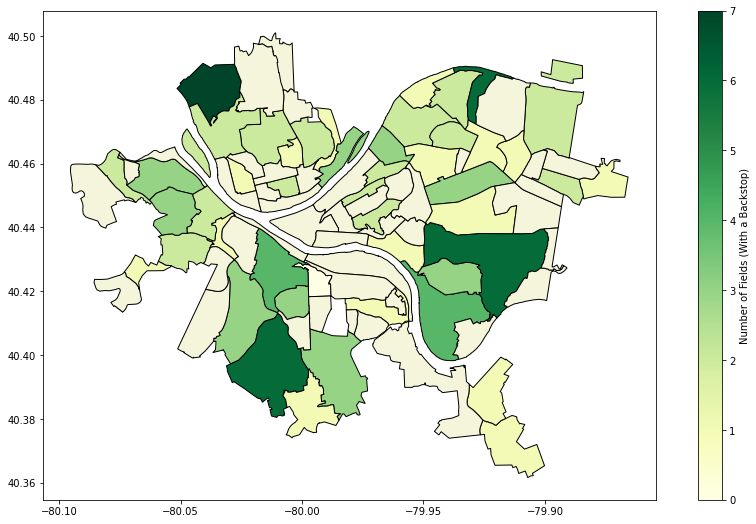

In [10]:
import pandas as pd
import geopandas
fields = pd.read_csv("fields.csv")
num_fields = fields.groupby("Neighborhood").sum()['Back Stop']
num_fields.sort_values(ascending=False)
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
fields_map = neighborhoods.merge(num_fields, how='left', left_on='hood', right_on='Neighborhood')
fields_map[['hood','Back Stop','geometry']].head()
fields_map.plot(column='Back Stop',
               cmap='YlGn',
               edgecolor="black",       
               legend=True,
               legend_kwds={'label': "Number of Fields (With a Backstop)"},
               figsize=(15, 9),       
               missing_kwds={"color": "beige"} 
               )

We have now removed fields located on playgrounds, and can now see where the actual playing fields are located. In the top left is Brighton Heights, in the bottom left is Brookline, in the middle right is Squirrel Hill South, and in the top right is Morningside. We now need to see what fields have the most extra resources. These are things like actual dirt infields, batting cages, concession stands, or lights.

Text(0, 0.5, 'Number of Resources')

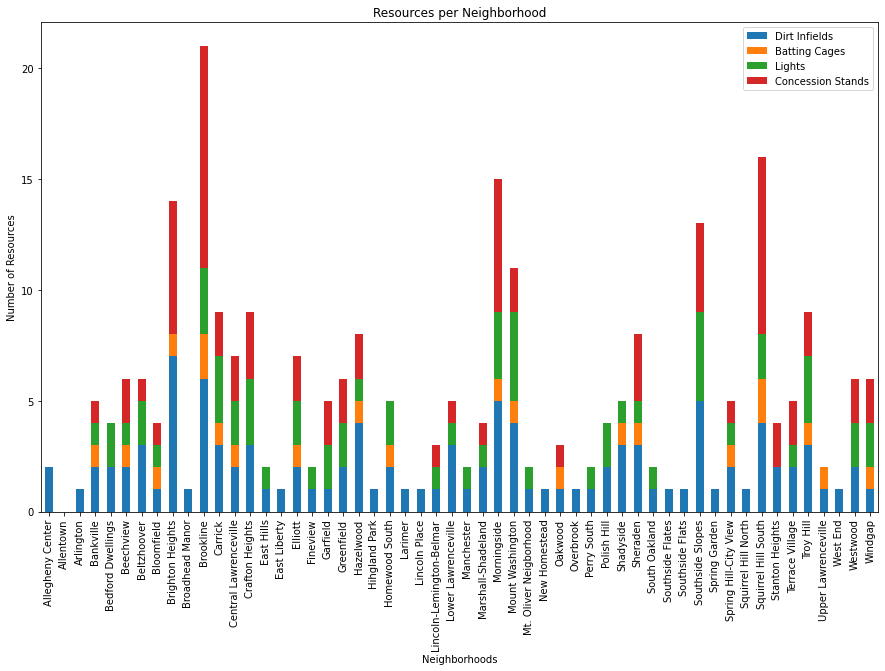

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
fields = pd.read_csv("fields.csv")
infield= fields.groupby("Neighborhood").sum()['Infield']
infield.sort_values(ascending=False)
battingcages= fields.groupby("Neighborhood").sum()['Battting Cage']#batting cage is misspelled in the data set
battingcages.sort_values(ascending=False)
concessionstands= fields.groupby("Neighborhood").sum()['Concession Stand']
concessionstands.sort_values(ascending=False)
lights= fields.groupby("Neighborhood").sum()['Lights']
lights.sort_values(ascending=False)


dataset = pd.DataFrame({'Dirt Infields': infield,
                        'Batting Cages': battingcages,
                        'Lights':lights,
                        'Concession Stands':concessionstands})
dataset.plot.bar(stacked=True, figsize=(15,9))
plt.yticks(np.arange(0, 25, step=5))
plt.title("Resources per Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Resources")

Brookline has the most extra resources by far.

# Rinks and Courts

My Metric In determining which neighborhood somone is most likely to become an athlete in the city of pittsburgh is by measuring the courts and rinks in every given neighborhood in the greater Pittsburgh Area. I chose the courts and einks data set due to the fact that many sports can be played on these surfaces such as hockey, basketball, soccer and tennis. The dataset I will be including is from WPDC and tells what the surface is and what kind of court or rink is described.

In [1]:
# Import necessary libraries
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the dataset
df = pd.read_csv('CourtsandRinks.csv')

# Initialize a map centered around Pittsburgh
map_pittsburgh = folium.Map(location=[40.4406, -79.9959], zoom_start=12)

# Collect data points from the DataFrame assuming 'latitude' and 'longitude' are the correct column names
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]

# Add a heatmap to the map using the data points
HeatMap(heat_data).add_to(map_pittsburgh)

# Display the map
map_pittsburgh

Due to my data set Including the longitude and longitude cordanates for each court and rink. The reason I chose the hatmap is it provides an illustration showing the locations of Pittsburgh's courts and rinks in various neighborhoods. Aspiring professional athletes can use this heat map to identify neighborhoods with a dense network of sports facilities, which may indicate a strong sports culture and infrastructure. For athletes wishing to maximize their athletic development and pursue professional professions, this visualization is an invaluable resource for choosing training and living locations.

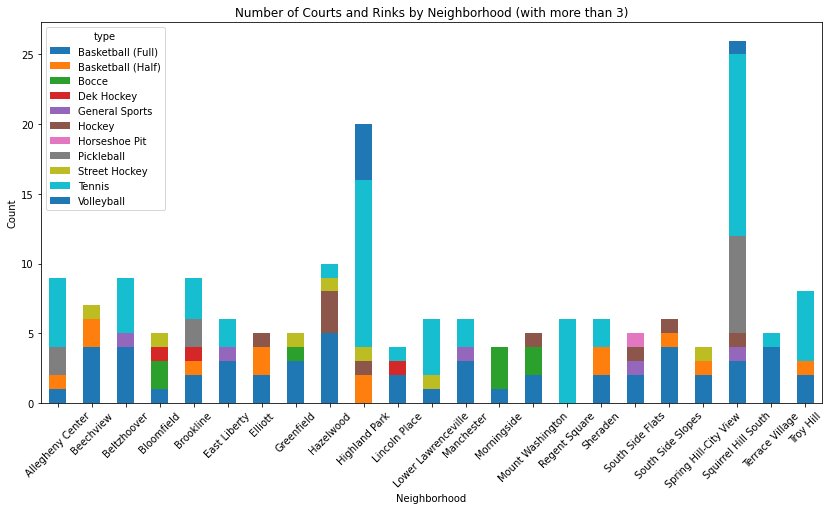

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('CourtsandRinks.csv')  # Adjust filename as necessary

count_by_neighborhood = df.groupby(['neighborhood', 'type']).size().unstack(fill_value=0)

# Count the number of courts and rinks by neighborhood
count_by_neighborhood = df.groupby('neighborhood').size()

# Filter neighborhoods with more than three courts or rinks
count_by_neighborhood_filtered = count_by_neighborhood[count_by_neighborhood > 3]

# Filter the original DataFrame to include only neighborhoods with more than three courts or rinks
df_filtered = df[df['neighborhood'].isin(count_by_neighborhood_filtered.index)]

# Group the filtered DataFrame by neighborhood and facility type
count_by_neighborhood_type = df_filtered.groupby(['neighborhood', 'type']).size().unstack(fill_value=0)

# Plotting the filtered data
count_by_neighborhood_type.plot(kind='bar', stacked=True, figsize=(14, 7))

# Adding titles and labels
plt.title('Number of Courts and Rinks by Neighborhood (with more than 3)')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotates the labels on the x-axis for better readability

plt.show()

The reason for this bar graph is that it is a great representation of not only the amount of courts but also the diversity of the courts. This allowed me to see what neighborhood gives someone the recourses to discover not only a place to find the sport they want to play but also grasp a hold of different sports. It is important to consider what neighborhood has a diverse options for someone to train in rather than just sheer amount of courts.

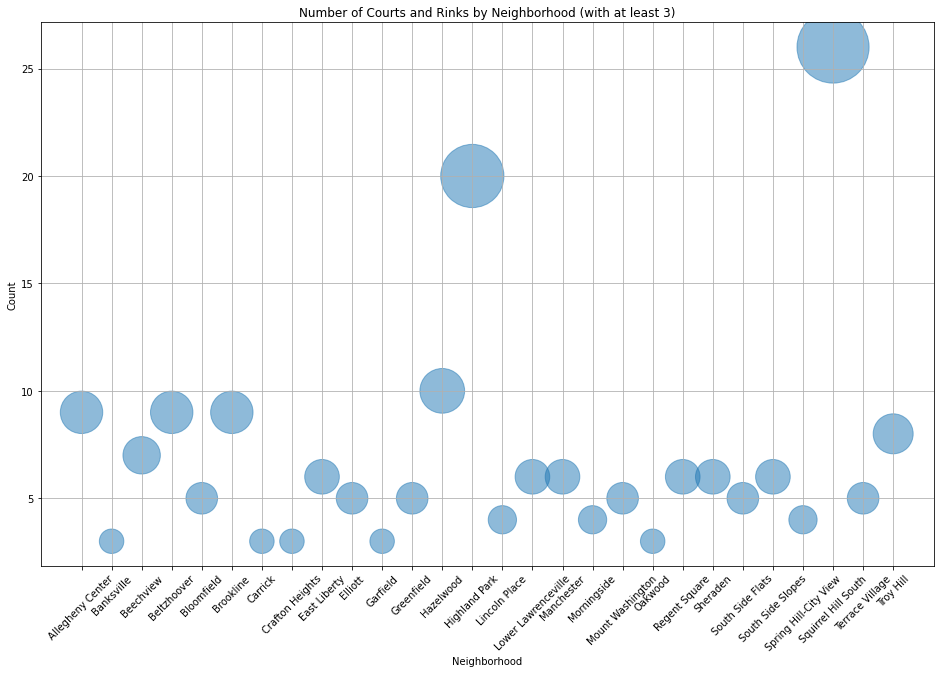

In [3]:
import matplotlib.pyplot as plt

# Filter neighborhoods with less than three courts or rinks
count_by_neighborhood_filtered = count_by_neighborhood[count_by_neighborhood >= 3]

# Create a larger figure size
plt.figure(figsize=(16, 10))

# Plotting a bubble chart with larger bubbles
plt.scatter(count_by_neighborhood_filtered.index, count_by_neighborhood_filtered.values, s=count_by_neighborhood_filtered.values*200, alpha=0.5)

# Adding titles and labels
plt.title('Number of Courts and Rinks by Neighborhood (with at least 3)')
plt.xlabel('Neighborhood')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Rotates the labels on the x-axis for better readability
plt.grid(True)  # Add grid lines for better visualization
plt.show()

A bubble graph provides a clear and striking visual depiction of the locations of courts and rinks throughout neighborhoods. By encoding the number of sporting facilities as bubble sizes, viewers may identify neighborhoods with more amenities more quickly. Athletes may quickly discover places with the best sports infrastructure for training and competition because to this visual simplicity, which makes comparative analysis easier. The graph's preservation of spatial context guarantees that geographic factors stay front and center, assisting players in choosing where to focus their athletic pursuits.

# Pools

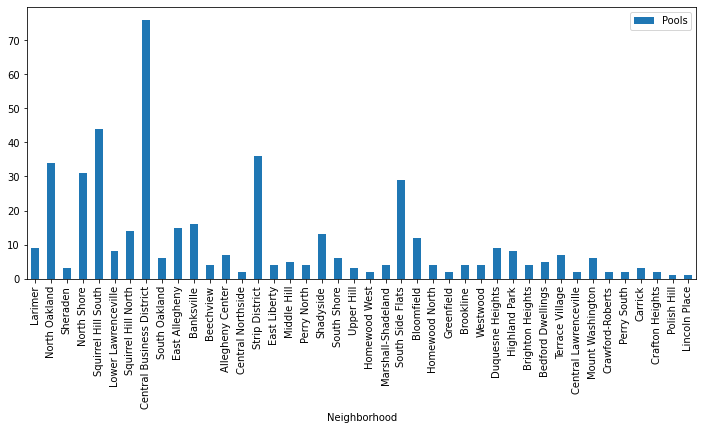

In [6]:
import pandas as pd
import numpy as np
import fpsnippets
import matplotlib.pyplot as plt

%matplotlib inline

neighborhoodlist = dict()
pooldata = pd.read_csv("pittsburghpools.csv")

#counting how many in each neighborhood

for index, row in pooldata.iterrows():
    lat = row['Facility Latitude']
    long = row['Facility Longitude']       
    neighborhood = fpsnippets.geo_to_neighborhood(lat,long)
    if neighborhood in neighborhoodlist and neighborhood!= None:
                neighborhoodlist[neighborhood] = neighborhoodlist[neighborhood]+1
    if neighborhood not in neighborhoodlist and neighborhood!= None:
            neighborhoodlist[neighborhood] = 1
 
    

totalneighborhoods = list(neighborhoodlist.keys())
totalpools = list(neighborhoodlist.values())
plotinfo = pd.DataFrame({'Neighborhood': totalneighborhoods,
                        'Pools' :totalpools})


plotinfo.plot.bar(x='Neighborhood', y='Pools',figsize=(12, 5))

To start off, this dataset included latitude and longitude data which I utilized in order to determine in which neighborhood each pool was located in. Some of the data points had to be filtered out as they didn’t fall inside of a Pittsburgh neighborhood. From this, we can see that the Central Business District has the highest number of pools, with the next most populated being Squirrel Hill South.

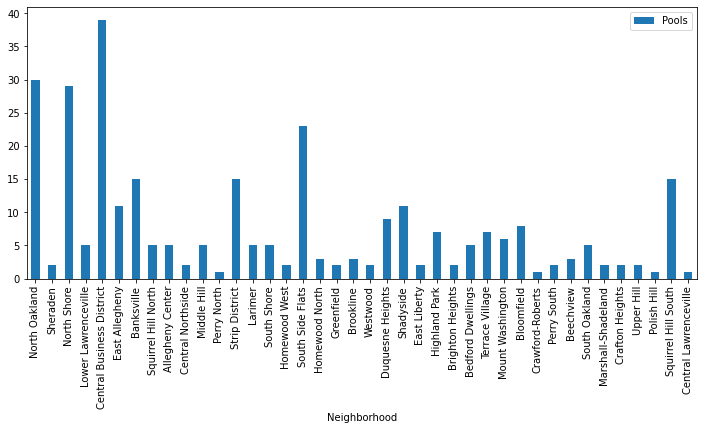

In [7]:
import pandas as pd
import numpy as np
import fpsnippets
import matplotlib.pyplot as plt

%matplotlib inline

neighborhoodlist = dict()
pooldata = pd.read_csv("pittsburghpools.csv")


#How many passed inspections


for index, row in pooldata.iterrows():
    lat = row['Facility Latitude']
    long = row['Facility Longitude']     
    inspectionpassed = row['Inspection Passed'] 
    if inspectionpassed == 't':
        neighborhood = fpsnippets.geo_to_neighborhood(lat,long)
        if neighborhood in neighborhoodlist and neighborhood!= None:
                    neighborhoodlist[neighborhood] = neighborhoodlist[neighborhood]+1
        if neighborhood not in neighborhoodlist and neighborhood!= None:
                neighborhoodlist[neighborhood] = 1

        

totalneighborhoods = list(neighborhoodlist.keys())
totalpools = list(neighborhoodlist.values())
plotinfo = pd.DataFrame({'Neighborhood': totalneighborhoods,'Pools' :totalpools})


plotinfo.plot.bar(x='Neighborhood', y='Pools',figsize=(12, 5))


As the dataset I used was inspection based, I wanted to then narrow down the data to show which neighborhood had the most pools that passed their inspection and filter out those that did not. From doing this, we see that Central Business District kept their first place position while the second place position becomes North Oakland, with Squirrel Hill Dropping much lower in the rankings.

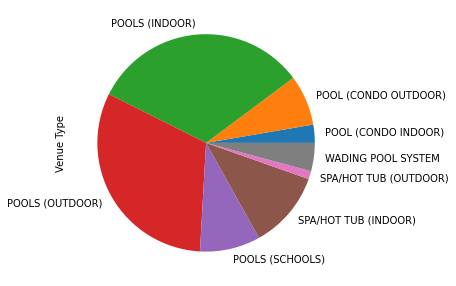

In [5]:
import pandas as pd
import numpy as np
import fpsnippets
import matplotlib.pyplot as plt

%matplotlib inline

neighborhoodlist = dict()
pooldata = pd.read_csv("pittsburghpools.csv")
venuelist = dict()

#Venue Type

for index, row in pooldata.iterrows():
    venuetype = row['Venue Type']
    if venuetype in venuelist:
        venuelist[venuetype] = venuelist[venuetype] + 1
    if venuetype not in venuelist:
        venuelist[venuetype] = 1

pooldata["Venue Type"].value_counts().sort_index().plot.pie(y='Venue Type', 
                                                 subplots=False, 
                                                 figsize=(12, 5))

Of the dataset, a few different types of venues that provide pools were provided so to express that, I made a pie chart where we can see that the most common are indoor and outdoor pools, which is to be expected.

# Conclusions

### Lexi's Conclusion

The neighborhood that has been the best option for pools has been the Central Business District, with there being not only the most overall presence of pools but also having the most pools that pass inspection requirements. The two runners up would be North Oakland and North Shore respectively. If you were to not require the inspection passed, it would change the two runners up.

### Joe's Conclusion

Overall the neighborhood I have established as the best possible neighborhood to become a professional athlete in based on Courts and rinks would be Brookline. The reason for this is due to the fact that they have a broad range of court types. They include Basketball courts, tennis courts, Pickleball courts, volleyball courts and dek hockey rinks. even though you look at Highland Park and Spring Hill-City View and see they have such a high amount of courts, Those are mainly one type of court and are all in the same area. For example, Highland park has courts named Highland Park tennis court 1-14. theese make up most of the density of their courts. Thus making the diversity of the neighborhood Brookline a better fit for someone who is trying to become a professional athlete.  

### Logan's Conclusion

Given that Brookline has a large amount of fields and by far the most extra resources, we can easily say that Brookline is the best neighborhood to raise a baseball player. Second place would be Squirrel Hill South and Brighton Heights due to the larger amount of fields. The worst neighborhood to be a baseball player would be Allentown as they have one field with no lights, backstop, batting cages, concession stands, and they have a grass infield.